<a href="https://colab.research.google.com/github/bikash119/bikash119/blob/main/learn_pytorch_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pytorch Custom Dataset

In [1]:
import requests
import zipfile
from pathlib import Path

data_path=Path("data/")
image_path=data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f'{image_path} directory exists')
else:
  print(f'Did not find {image_path} directory, creating one...')
  image_path.mkdir(parents=True,exist_ok=True)

  #### Download pizza, steak, sushi
  with open(data_path/"pizza_steak_sushi.zip","wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading data....")
    f.write(request.content)
  
  with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip",'r') as zip_ref:
    print("Unzipping data....")
    zip_ref.extractall(image_path)


data/pizza_steak_sushi directory exists


### Helper function to walk through directory and list down its contents

In [2]:
import os

def walk_through(dir_path):
  """
    Walks through a directory and prints the number of files / directories in the directory

    Args:
      dir_path (str or pathlib.Path): target directory

    Returns:
      A print of:
        Number of subdirectories in dir_path
        Number of images in each subdirectory
        name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

In [3]:
walk_through(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi.
There are 3 directories and 0 images in data/pizza_steak_sushi/test.
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza.
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak.
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi.
There are 3 directories and 0 images in data/pizza_steak_sushi/train.
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza.
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak.
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi.


### Visualize the image

 Random image path: data/pizza_steak_sushi/test/sushi/1245193.jpg
 Image class: sushi
 Image height: 295
 Image width: 512


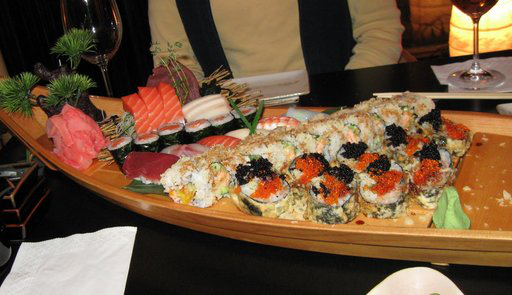

In [4]:
import random
from PIL import Image

### Set Seed
random.seed(42)

### Get all image path
image_path_list = list(image_path.glob("*/*/*.jpg"))

### Get random image path
random_image_path = random.choice(image_path_list)

### Get image class
image_class = random_image_path.parent.stem

### Get image
img = Image.open(random_image_path)

### Print metadata

print(f' Random image path: {random_image_path}')
print(f' Image class: {image_class}')
print(f' Image height: {img.height}')
print(f' Image width: {img.width}')
img

In [5]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### Transforming data with `torchvision.transforms`

In [6]:
# Write transforms for image

data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=.05),
    transforms.ToTensor()
])

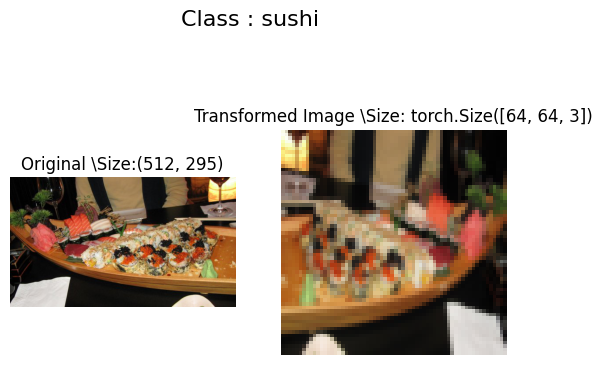

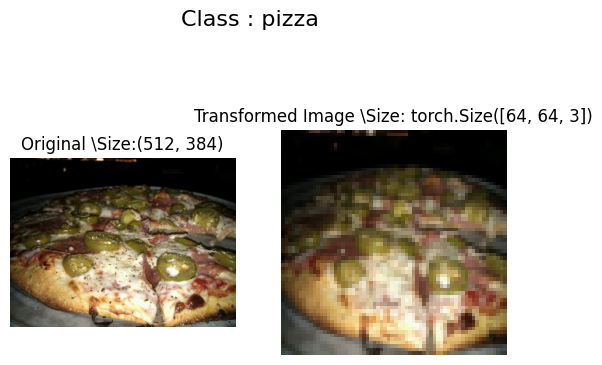

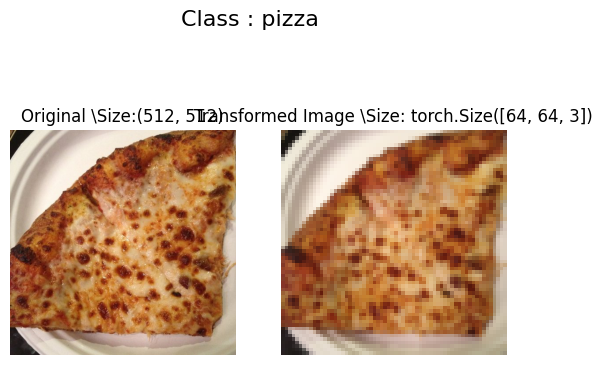

In [7]:
import matplotlib.pyplot as plt
def plot_transformed_images(image_path,transform,n=3,seed=42):
  """
    Plot a series of random images from image_path

    Args:
      image_path (List): List of target image paths
      transform (torchvision.transforms) : Transforms to apply to images.
      n(int, optional): Number of images to plot. Default 3
      seed(int, optional) : Random seed for the random generator
  """

  random.seed(seed)
  random_image_paths = random.sample(image_path,k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1, 2)
      ax[0].imshow(f)
      ax[0].set_title(f'Original \Size:{f.size}')
      ax[0].axis('off')

      #### Transformed Image
      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f'Transformed Image \Size: {transformed_image.shape}')
      ax[1].axis('off')

      fig.suptitle(f'Class : {image_path.parent.stem}',fontsize=16)


plot_transformed_images(image_path_list,data_transform)


#### Set up train and test dir

In [8]:
train_dir = image_path/ "train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### Turn the image data into pytorch understandable `Dataset`
### Using `torchvision.dataset.ImageFolder`

In [9]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f'Train data: {train_data} \n Test data: {test_data}')

Train data: Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.05)
               ToTensor()
           ) 
 Test data: Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.05)
               ToTensor()
           )


### Some checks to see if the dataset created is fine

In [10]:
train_data.classes

['pizza', 'steak', 'sushi']

In [11]:
train_data.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [12]:
len(train_data),len(test_data)

(225, 75)

### Create `DataLoader` from `Dataset`

In [13]:
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fe7891b1630>,
 <torch.utils.data.dataloader.DataLoader at 0x7fe7891b3df0>)

In [14]:
img,lbl = next(iter(train_dataloader))
print(f' Image Shape : {img.shape} -> [ batch_size,channel, height, width]')
print(f' Label Shape : {lbl.shape}')

 Image Shape : torch.Size([1, 3, 64, 64]) -> [ batch_size,channel, height, width]
 Label Shape : torch.Size([1])


In [15]:

from typing import Tuple, Dict, List
def find_classes(directory:str) -> Tuple[List[str],Dict[str,int]]:
  """
    A function to read a directory and 
    a) return the name of the subdirectories as classes
    b) a dictionary with name of the class and corresponding index in the list

    The function assumes the directory structure `directory` is in standard classification format

    Args:
      directory(string): The target directory to be scanned.

    Returns: 
      A Tuple with 
        first element as list of string 
      and 
        second element as a dicitonary of ( class_name(string), index(int) )
  """

  classes = [entry.name for entry in os.scandir(train_dir) if entry.is_dir()]

  if classes is None:
    raise FileNotFoundError(f"Couldn't find any classes in {directory} or the directory doesn't have standard classification structure")

  class_to_idx = { ab: i for i,ab in enumerate(classes)}

  return classes,class_to_idx


In [16]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### Create Custom Dataset with ImageFolder

In [37]:
from torch.utils.data import Dataset
import pathlib


class CustomImageFolderDataset(Dataset):

  def __init__(self,targ_dir:str, transform=None) -> None:
    
    ## Create class attributes
    ## Get all image paths
    self.paths = list(pathlib.Path(targ_dir).glob('*/*.jpg'))

    ## Setup Transforms
    self.transform = transform

    self.classes, self.class_to_idx = find_classes(targ_dir)

  
  def load_img(self,idx:int) -> Image.Image:
    "Opens an image given a index via a path and returns it"

    img_path = self.paths[idx]
    return Image.open(img_path)

  
  def __len__(self) -> int:
    "Returns total number of samples"
    return len(self.paths)

  def __getitem__(self,idx:int) -> Tuple[torch.Tensor,int]:
    "Returns one sample of data and label(X,y)"

    ## Load the image
    img = self.load_img(idx)
    class_name = self.paths[idx].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img),class_idx
    else:
      return img,class_idx


### Add some transforms 

In [38]:
train_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

### No augmentation, only resize
test_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
    ])

#### Lets convert the data in the folder to pytorch dataset using our `CustomImageFolderDataset` class

In [39]:
train_dataset_custom = CustomImageFolderDataset(targ_dir = train_dir,
                                         transform= train_transforms)

test_dataset_custom = CustomImageFolderDataset(targ_dir= test_dir,
                                        transform=test_transforms)

train_dataset_custom, test_dataset_custom

(<__main__.CustomImageFolderDataset at 0x7fe78b324070>,
 <__main__.CustomImageFolderDataset at 0x7fe78b3266b0>)

In [40]:
len(train_dataset_custom), len(test_dataset_custom)

(225, 75)

In [41]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          seed: int = None):
  
  """
    A function to take datasets and display random images from the dataset.

    Args:
      dataset(torch.utils.data.Dataset) : Target image dataset to be used to display images.
      classes(List[str]) : List of classes in our dataset.
      n (int): Number of images to be displayed. Max = 10
      seed (int) : Random seed to be used
  """

  if n > 10:
    n = 10

  if seed:
    random.seed(42)

  ## Get random sample indexes
  print(f'Lenth of dataset: {len(dataset)}')
  random_sample_idx = random.sample(range(len(dataset)),k=n)

  ## Setup the plot
  plt.figure(figsize=(16,8))

  ## Loop through the indexes and display the images at idx
  for i , targ_sample in enumerate(random_sample_idx):
    targ_img , targ_idx = dataset[targ_sample][0], dataset[targ_sample][1]

    targ_img_adjust = targ_img.permute(1,2,0)

    ## plot the samples
    plt.subplot(1,n,i+1)
    plt.imshow(targ_img_adjust)
    plt.axis("off")
    if classes:
      title = f"class {classes[targ_idx]}"
      title = title + f"\nshape: {targ_img_adjust.shape}"

    plt.title(title)


Lenth of dataset: 225


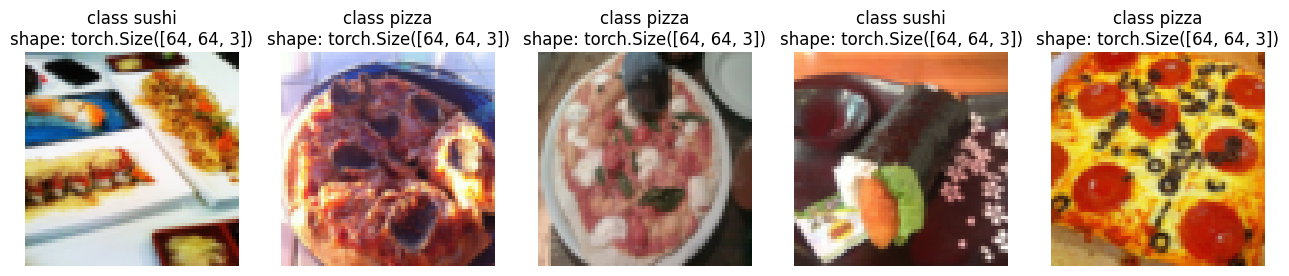

In [42]:
class_names = train_data.classes
display_random_images(dataset=train_data,classes=class_names,n=5,seed=42)

Lenth of dataset: 225


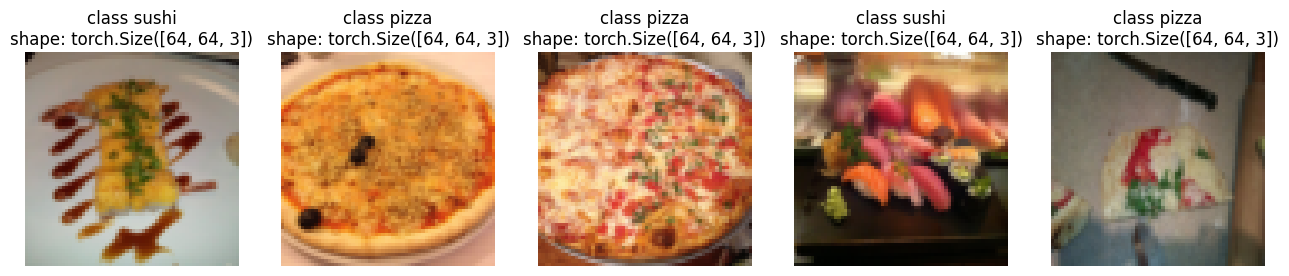

In [45]:
custom_class_names = train_dataset_custom.classes
display_random_images(dataset=train_dataset_custom,classes=class_names,n=5,seed=42)

### Turn custom dataset to pytorch DataLoader

In [46]:
train_dataloader_custom =  DataLoader(dataset=train_dataset_custom,
                                      batch_size=1,
                                      shuffle=True,
                                      num_workers=1)

test_dataloader_custom = DataLoader(dataset=test_dataset_custom,
                                    batch_size=1,
                                    shuffle=False,
                                    num_workers=1)

train_dataloader_custom,test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7fe77e4ceec0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fe77e4ccf70>)

### Model 0 with no transforms , only resize

In [47]:
### define transforms
no_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])
NUM_WORKERS = os.cpu_count()
BATCH_SIZE = 32
### Create Datasets
train_dataset_no_transform = CustomImageFolderDataset(targ_dir=train_dir,
                                                transform=no_transform)
test_dataset_no_transform = CustomImageFolderDataset(targ_dir=test_dir,
                                               transform=no_transform)

### Verfy if the datasets are created properly
print(f' Length of train dataset: {len(train_dataset_no_transform)}')
print(f' Length of test dataset: {len(test_dataset_no_transform)}')
### Create Dataloader

train_dataloader_no_tranform = DataLoader(dataset=train_dataset_no_transform,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True,
                                          num_workers=NUM_WORKERS)
test_dataloader_no_tranform = DataLoader(dataset=test_dataset_no_transform,
                                         batch_size=BATCH_SIZE,
                                         shuffle=True,
                                         num_workers=NUM_WORKERS)

train_dataloader_no_tranform,test_dataloader_no_tranform

 Length of train dataset: 225
 Length of test dataset: 75


(<torch.utils.data.dataloader.DataLoader at 0x7fe77e4cd630>,
 <torch.utils.data.dataloader.DataLoader at 0x7fe77e4cd210>)

In [49]:
# Get image and label from custom DataLoader
img_no_tranform_from_dataloader, label_no_tranform_from_dataloader = next(iter(train_dataloader_no_tranform))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_no_tranform_from_dataloader.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_no_tranform_from_dataloader.shape}")


Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


In [50]:
img_no_tranform , label_no_transform= train_dataset_no_transform[0][0], train_dataset_no_transform[0][1]
print(f"Image shape: {img_no_tranform.shape} -> [color_channels, height, width]")
print(f"Label shape: {label_no_tranform.shape}")

Image shape: torch.Size([3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


In [56]:
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [55]:

class TinyVGG(nn.Module):
  def __init__(self,input_shape: int, hidden_units: int, output_shape:int):
    super().__init__()

    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
                
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self,x) -> torch.Tensor:
    return self.classifier(self.block_2(self.block_1(x)))


torch.manual_seed(42)
model_v0 = TinyVGG(input_shape=3,
                   hidden_units=10, 
                   output_shape=len(train_dataset_no_transform.classes)).to(device)
model_0                   

NameError: ignored